In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [27]:
df = pd.read_csv('train.csv')
df.head()

X=df['Message']
Y=df['Type']


In [28]:
df_test = pd.read_csv('test.csv')
df_test.head()

X_test1=df_test['Message']
Y_test1=df_test['Type']

In [5]:
#Find count and unique messages count of all the messages
df.describe()

,Type,Message
count,4142,4142
unique,2,3906
top,Friendly,"Ksnnk, S'xx myxx xyban"
freq,3585,26


In [6]:
#Extract SPAM messages
spam_messages = df[df["Type"]=="Hostile"]
spam_messages.head() #Display first 5 rows of SPAM messages

,Type,Message
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...
6,Hostile,Lyt ksin esfcxa 11 eslbvu sn esna? Y D albcbxa...
8,Hostile,"KST mvylmau bs wcl COKL! Xnse 100 bs 20,000 zs..."
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...
12,Hostile,"TTTUsfcxaUspcaCxif: Rs iua ksin mnatcb, mxcmq ..."


In [7]:
#Find count and unique messages count of SPAM messages.
spam_messages.describe()

,Type,Message
count,557,557
unique,1,501
top,Hostile,LUF VIBYK KPQCSON 500 zsiltu sh oalicla LUF ps...
freq,557,3


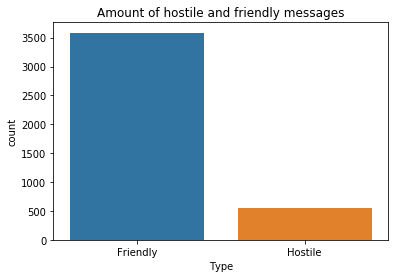

In [8]:
#Plot the counts of HAM (non SPAM) vs SPAM
sns.countplot(data = df, x= df["Type"]).set_title("Amount of hostile and friendly messages")
plt.show()

**Splitting the SMS data into Test and Train data**

In [259]:
data_train, data_test, labels_train, labels_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (3313,) (3313,)
data_test, labels_test:  (829,) (829,)


**Extraction & CountVectorize**


*The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.*

In [275]:
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(analyzer = 'char', max_df=0.2,ngram_range=(1,8))
#fit & transform
# fit: build dict (i.e. word->wordID)  
# transform: convert document (i.e. each line in the file) to word vector 
tfidf = tfidf_vectorizer.fit(data_train)
data_train_count  = tfidf.transform(data_train)
data_test_count  = tfidf.transform(data_test)
data_test_count2 = tfidf.transform(X_test1)

In [276]:
data_test_count.shape, data_test_count2.shape

((829, 550550), (1380, 550550))

**Modelling & training**

Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [289]:
for i in range(1):
    clf = MultinomialNB(alpha=.0044)
    clf.fit(data_train_count, labels_train)
    predictions = clf.predict(data_test_count)
    print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9891435464414958


**Results and Accuracy**

In [290]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9891435464414958


**Confusion Matrix**


*A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.*

In [291]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[707   2]
 [  7 113]]


In [292]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    Friendly       0.99      1.00      0.99       709
     Hostile       0.98      0.94      0.96       120

    accuracy                           0.99       829
   macro avg       0.99      0.97      0.98       829
weighted avg       0.99      0.99      0.99       829



In [293]:
predictions_test = clf.predict(data_test_count2)

In [294]:
df_predictions_test=pd.DataFrame(predictions_test)
df_predictions_test.to_csv('predictions_test2_cv.csv')

In [266]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=40, shuffle=True, random_state=0)

for i in range(1,10):
    clf = MultinomialNB(alpha=i*.00000001)
    print(np.mean(cross_val_score(clf, data_train_count, labels_train, cv=k_fold, n_jobs=1)),np.var(cross_val_score(clf, data_train_count, labels_train, cv=k_fold, n_jobs=1)))

0.9858029679694387 0.00013780891449947924
0.9861041727887159 0.00012086780300678492
0.9861041727887159 0.00012086780300678492
0.9861041727887159 0.000106351908101864
0.9858029679694388 0.00010877712468963735
0.9858029679694388 0.00010877712468963735
0.9858029679694388 0.00010877712468963735
0.9861078460182192 0.00010618682595752867
0.9858029679694387 0.00010877712468963734


In [183]:
from sklearn.cross_validation import KFold, cross_val_score

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [258]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier = Pipeline([
                      ('tfidf', TfidfVectorizer()),
                      ('clf', MultinomialNB())
])

classifier.fit(data_train_count, labels_train)


from sklearn.model_selection import GridSearchCV
parameters = {'tfidf__ngram_range': [(1, 5), (1, 6), (1, 7),(1, 8),(1, 9),(1, 10)],
              'clf__alpha': (0, 0.01, 0.05, 0.1, 0.3, 0.5),
}
gs_clf = GridSearchCV(classifier, parameters)
gs_clf.fit(data_train_count, labels_train)


# Predicting the Test set results
y_pred_proba = gs_clf.predict(data_test_count)

AttributeError: lower not found